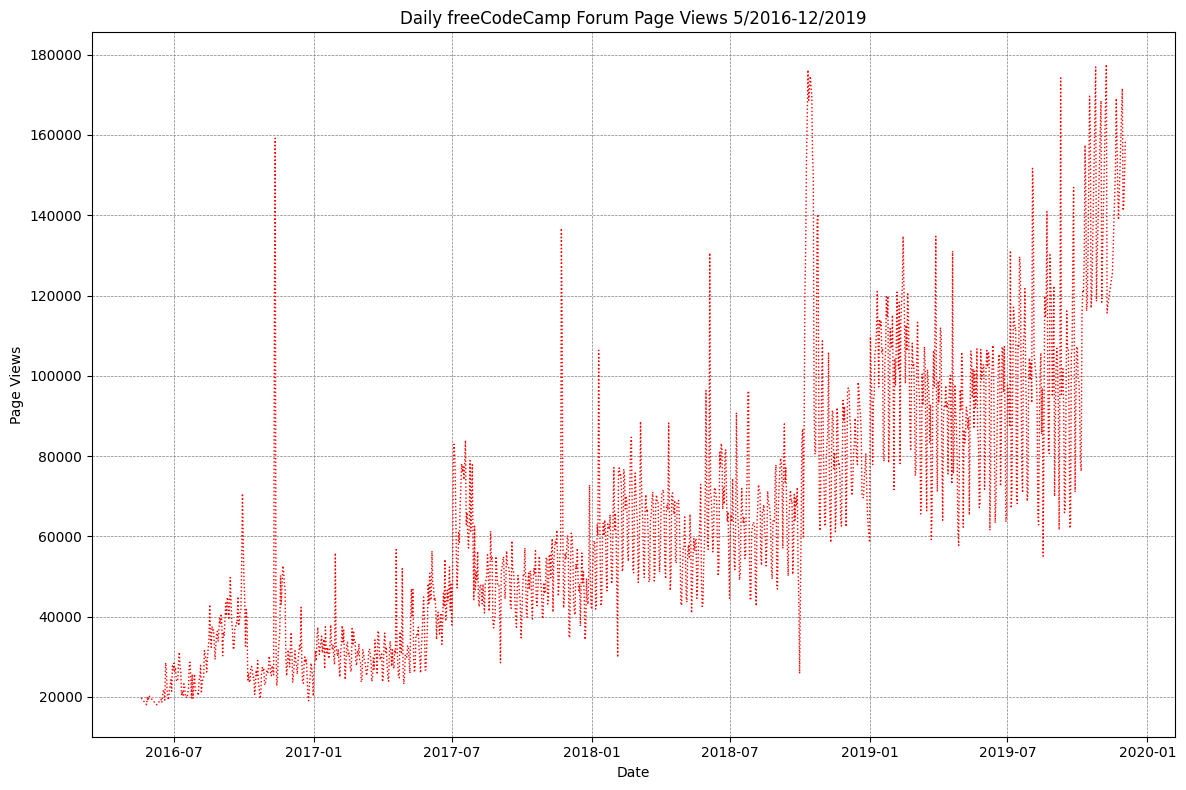

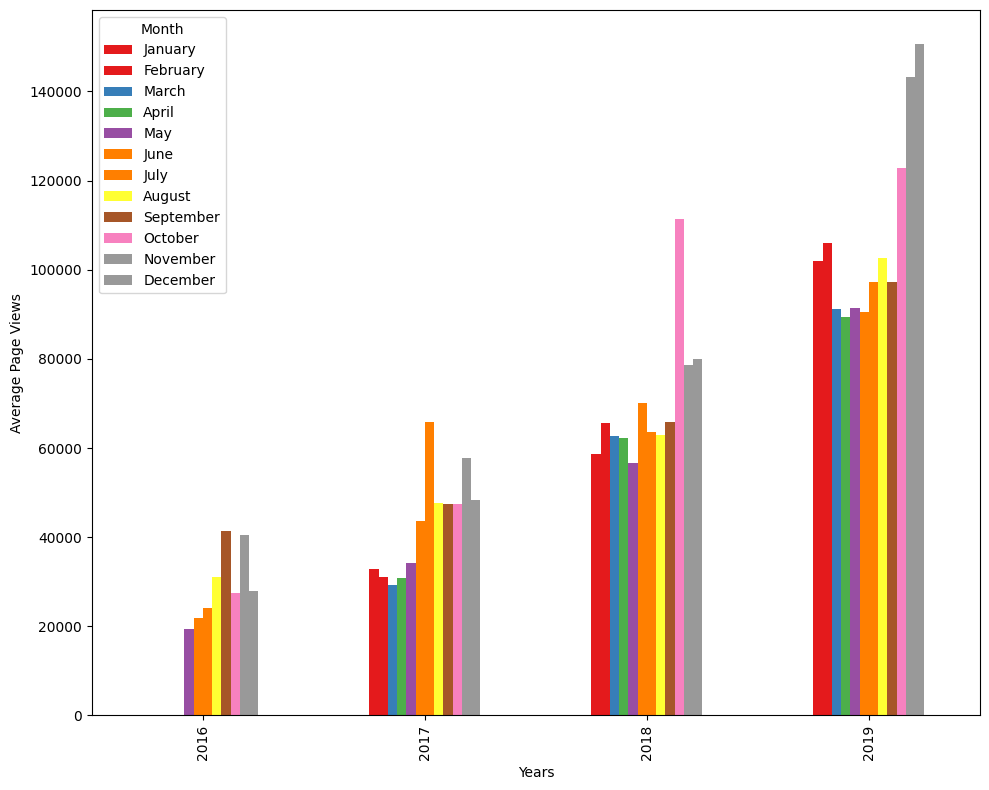

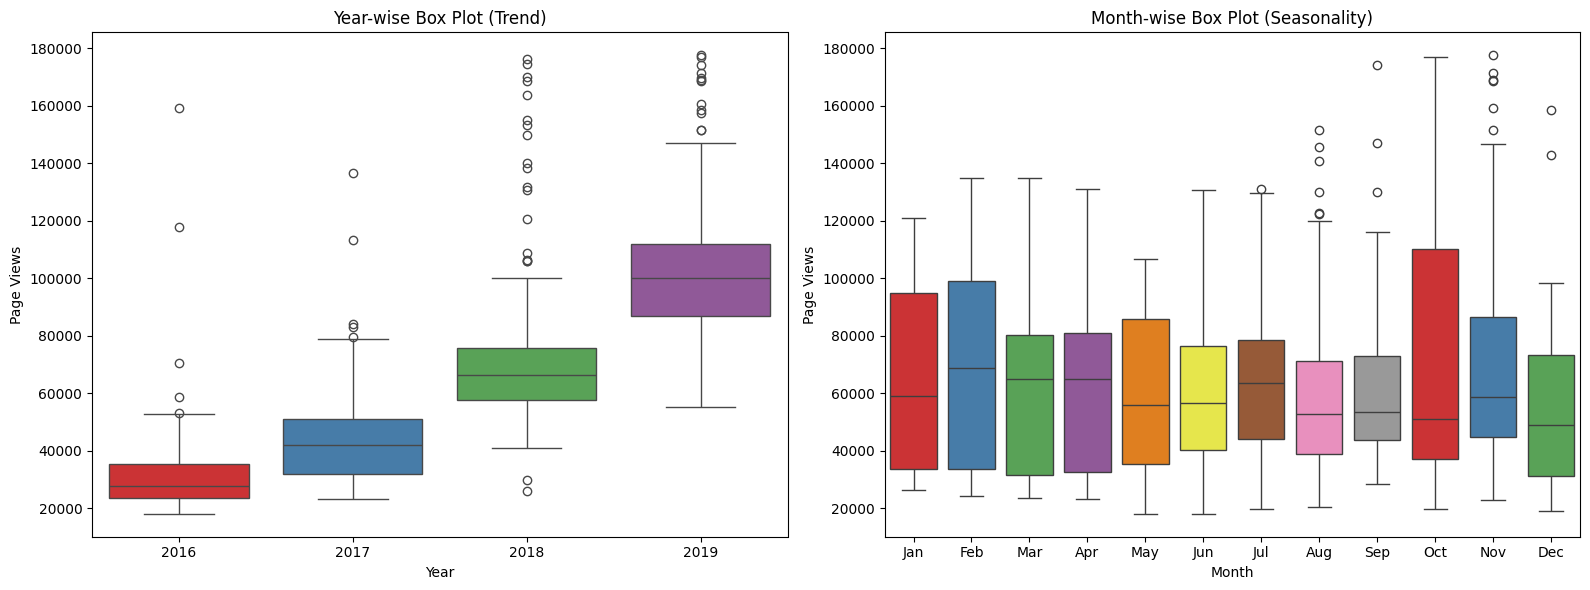

In [3]:
# === [Import Libraries] ===
import matplotlib.pyplot as plt
import pandas as pd
import calendar 
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# === [Load and Prepare Data] ===
# Load the dataset with 'date' parsed as datetime and set as index
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

# Remove top and bottom 2.5% of data to eliminate outliers
df = df[(df['value'] > df['value'].quantile(0.025)) &
        (df['value'] < df['value'].quantile(0.975))]

# === [Function: Line Plot] ===
def draw_line_plot():
    # Create a line plot showing daily page views
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(df.index, df['value'], linewidth=1, linestyle=':', color='red')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    
    # Save and return figure
    fig.savefig('line_plot.png')
    return fig

# === [Function: Bar Plot] ===
def draw_bar_plot():
    # Prepare monthly average page views grouped by year and month
    df_bar = df.copy()
    df_bar['Years'] = df.index.year
    df_bar['Month'] = df.index.strftime('%B')
    
    # Define month order for sorting
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    df_bar['Month'] = pd.Categorical(df_bar['Month'], categories=month_order, ordered=True)
    df_bar.sort_values(by=['Years', 'Month'], inplace=True)

    # Group and calculate mean
    monthly_avg_df = df_bar.groupby(['Years', 'Month'], observed=False)['value'].mean().reset_index()
    monthly_avg_df.rename(columns={'value': 'Average Page Views'}, inplace=True)

    # Pivot for plotting
    monthly_avg_pivot = monthly_avg_df.pivot(index='Years', columns='Month', values='Average Page Views')

    # Create bar plot
    ax = monthly_avg_pivot.plot(kind='bar', figsize=(10, 8), colormap='Set1')
    ax.set_ylabel('Average Page Views')
    plt.tight_layout()
    
    # Save and return figure
    fig = ax.get_figure()
    fig.savefig('bar_plot.png')
    return fig

# === [Function: Box Plot] ===
def draw_box_plot():
    # Prepare data with separate 'year' and 'month' columns
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')
    
    # Define correct order for months
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    df_box['month'] = pd.Categorical(df_box['month'], categories=month_order, ordered=True)

    # Create box plots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    sns.boxplot(data=df_box, x='year', y='value', ax=axes[0], hue='year', palette='Set1', legend=False)
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    sns.boxplot(data=df_box, x='month', y='value', ax=axes[1], hue='month', palette='Set1', legend=False)
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    plt.tight_layout()

    # Save and return figure
    fig.savefig('box_plot.png')
    return fig
draw_line_plot()
draw_bar_plot()
draw_box_plot();


# Code Explanation

## Overview:
This script processes and visualizes time series data of page views from the freeCodeCamp forum. The data is cleaned to remove outliers and then visualized using three different types of plots: a line plot, a bar plot, and box plots.

## Data Source:
- **Input Dataset:** The data is stored in a CSV file (`fcc-forum-pageviews.csv`) with columns `date` and `value`. The `date` column is parsed as a datetime object, and `value` represents the number of page views.

## Objective:
The goal of this analysis is to:
1. Clean the data by removing outliers.
2. Visualize the data in three ways:
   - **Line plot:** To show daily trends over time.
   - **Bar plot:** To show average page views for each month over the years.
   - **Box plots:** To display the seasonal trends (month-wise) and yearly trends (year-wise).

## Methodology:
1. **Data Cleaning:** 
   - Outliers are removed based on the 2.5th and 97.5th percentiles of the page views.
2. **Visualizations:**
   - **Line Plot:** A line plot is created for daily page views from May 2016 to December 2019.
   - **Bar Plot:** A bar plot is generated to display the average page views for each month, grouped by year.
   - **Box Plot:** Two box plots are created, one showing the yearly trend and the other showing the monthly seasonality of page views.

## Output:
- **Line Plot:** A line plot showing the trend of daily page views, saved as `line_plot.png`.
- **Bar Plot:** A bar plot showing the average page views for each month, saved as `bar_plot.png`.
- **Box Plot:** Two box plots showing yearly trends and seasonal month-wise trends, saved as `box_plot.png`.

These visualizations help to understand trends, seasonality, and outliers in the page view data.
